## **Reading the Data**

In [12]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import iplot
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time
import sys

In [13]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [14]:
url_training='https://drive.google.com/file/d/1dMzOVOkFNktF1ech6Ixp-3Y9uIbkjnet/view?usp=sharing'
url_training='https://drive.google.com/uc?id=' + url_training.split('/')[-2]
df = pd.read_csv(url_training)

In [10]:
df

,Date,Tenor,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
0,1/5/2017,2M,0.468214,0.419251,0.376260,0.338158,0.304372,0.274823,0.250066,0.231535,0.221404,0.220933,0.228418,0.240437,0.254316,0.268613,0.282659,0.296172,0.309045,0.321260,0.332831
1,1/5/2017,3M,0.458471,0.412710,0.372717,0.337489,0.306511,0.279714,0.257540,0.241007,0.231434,0.229423,0.233839,0.242411,0.253100,0.264611,0.276244,0.287647,0.298654,0.309196,0.319254
2,1/5/2017,6M,0.410305,0.374189,0.343045,0.316070,0.292842,0.273231,0.257346,0.245440,0.237726,0.234116,0.234078,0.236765,0.241295,0.246945,0.253200,0.259726,0.266312,0.272831,0.279207
3,1/5/2017,9M,0.385267,0.354580,0.328360,0.305878,0.286712,0.270643,0.257590,0.247529,0.240401,0.236030,0.234085,0.234121,0.235658,0.238264,0.241586,0.245360,0.249397,0.253564,0.257773
4,1/5/2017,1Y,0.358986,0.333608,0.312126,0.293870,0.278408,0.265457,0.254819,0.246339,0.239855,0.235185,0.232109,0.230384,0.229760,0.230003,0.230908,0.232303,0.234052,0.236049,0.238213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13637,10/14/2019,15Y,0.290467,0.274071,0.259819,0.247286,0.236167,0.226238,0.217329,0.209309,0.202077,0.195550,0.189663,0.184359,0.179593,0.175321,0.171508,0.168118,0.165119,0.162481,0.160172
13638,10/14/2019,20Y,0.279726,0.263635,0.249695,0.237473,0.226660,0.217030,0.208411,0.200674,0.193716,0.187456,0.181826,0.176772,0.172247,0.168208,0.164617,0.161440,0.158642,0.156194,0.154063
13639,10/14/2019,25Y,0.275693,0.259711,0.245916,0.233859,0.223221,0.213769,0.205330,0.197769,0.190981,0.184884,0.179409,0.174499,0.170106,0.166187,0.162703,0.159618,0.156900,0.154517,0.152440
13640,10/14/2019,30Y,0.271637,0.256054,0.242648,0.230965,0.220685,0.211571,0.203450,0.196186,0.189673,0.183826,0.178577,0.173867,0.169647,0.165873,0.162507,0.159514,0.156861,0.154518,0.152458


In [15]:
url_ans='https://drive.google.com/file/d/1Mlcx_-BfXHsZ8qjDQXJ6V6fnVWwu7NiW/view?usp=sharing'
url_ans='https://drive.google.com/uc?id=' + url_ans.split('/')[-2]
df_ans = pd.read_csv(url_ans)

In [16]:
df_ans

,Date,Tenor,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
0,10/15/2019,2M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10/15/2019,3M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10/15/2019,6M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10/15/2019,9M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10/15/2019,1Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1/6/2020,15Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1136,1/6/2020,20Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1137,1/6/2020,25Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1138,1/6/2020,30Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Preliminary Processing**

In [17]:
moneyness_columns = '0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9'.split()
moneyness_axis = [float(x) for x in moneyness_columns]
tenor_axis = df.Tenor.unique()

def get_surfaces_and_dates(df):
    i=0
    num_ticks = 19
    time_steps = 1
    num_entries = 13642
    surfaces = []
    dates = []
    while i<num_entries:
        z = df[moneyness_columns].iloc[i:i+num_ticks].values
        surfaces.append(z)
        dates.append(df.Date.iloc[i])
        i += time_steps*num_ticks
    return np.array(surfaces),np.array(dates)

In [18]:
surfaces,dates = get_surfaces_and_dates(df)

## **Data Visualisation**

In [19]:
def get_surface_fig(x,y,z,date=""):
    surface = go.Surface(z=z,x=x,y=y)
    fig = go.Figure(data=[surface])
    scene = dict(xaxis_title="Tenor",
                 yaxis_title="Moneyness",
                 zaxis_title="Implied Volatility",
                 xaxis = dict(nticks=5),
                 yaxis = dict(nticks=5),
                 zaxis = dict(nticks=10, range=[0,0.8]),
                 aspectratio = dict(x=1,y=1,z=1),
                 camera=dict(eye=dict(x=1.8, y=1.8, z=1.5)))
    
    fig.update_layout(title="Implied Volatility Surface on {} (MM/DD/YYYY)".format(date),
                      width = 800, height = 800,
                      scene = scene
                      )
    return fig

def display_day(dates,surfaces,i):
    z  = surfaces[i]
    fig = get_surface_fig(x=tenor_axis,y=moneyness_axis,z=z,date=dates[i])
    fig.show()

In [20]:
display_day(dates,surfaces,200) #the third argument is the day

In [21]:
def show_time_series(surfaces,tenor_i=0,moneyness_i=0):
    plt.plot(surfaces[:,tenor_i,moneyness_i]) #first coordinate is date, second is tenor, third is Moneyness
    plt.title("Tenor: {}, Moneyness: {}".format(tenor_axis[tenor_i],moneyness_axis[moneyness_i]))
    plt.xlabel("Day Number")
    plt.ylabel("Implied Volatility")
    plt.show()

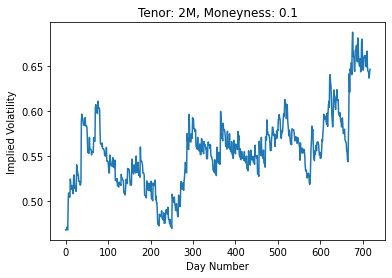

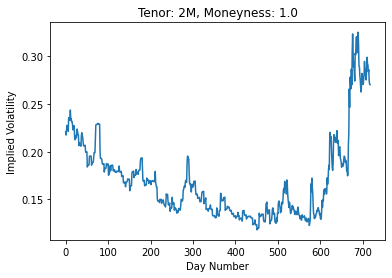

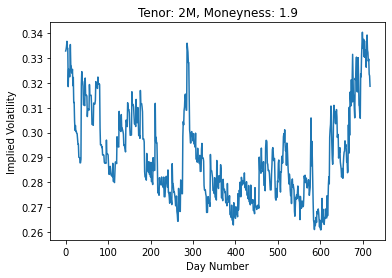

In [22]:
show_time_series(surfaces,tenor_i=0,moneyness_i=0)
show_time_series(surfaces,tenor_i=0,moneyness_i=9)
show_time_series(surfaces,tenor_i=0,moneyness_i=18)

It can be observed that the implied volatility is lowest when moneyness is closer to 1 (the smile curve being proven)

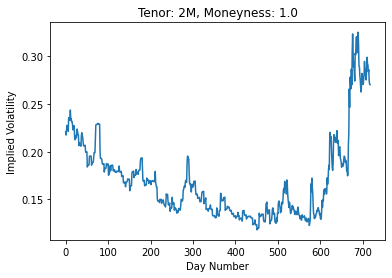

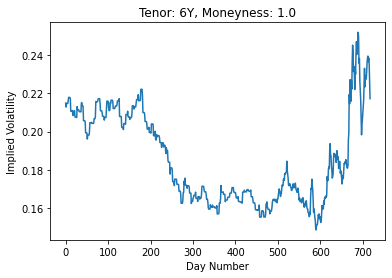

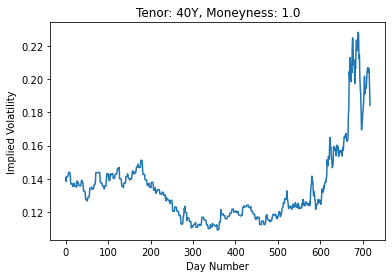

In [23]:
show_time_series(surfaces,tenor_i=0,moneyness_i=9)
show_time_series(surfaces,tenor_i=9,moneyness_i=9)
show_time_series(surfaces,tenor_i=18,moneyness_i=9)

# **Forecasting**

### **Method 1 - ARIMA**

In [50]:
def get_pred(train_data,model,forecast_len=60,start_day=-1):
    model_fit = model.fit()
    last_day = len(train_data)
    if start_day!=-1:
        yhat = model_fit.predict(start_day,last_day+forecast_len-1)
    else:
        yhat = model_fit.predict(last_day,last_day+forecast_len-1)
    return yhat

def get_rmse(test_data,yhat):
    return mean_squared_error(test_data,yhat,squared=False)
    
def plot_pred(train_data,test_data,yhat,tenor_i,moneyness_i,forecast_len=60,start_day=-1):
    last_day = len(train_data)
    if start_day==-1:
        start_day = last_day
    xhat = range(start_day,last_day+forecast_len,1)
    full_data = list(train_data)+list(test_data)
    plt.plot(full_data)
    plt.plot(xhat,yhat,color='r')
    plt.title("Tenor: {}, Moneyness: {}".format(tenor_axis[tenor_i],moneyness_axis[moneyness_i]))
    plt.legend(['Actual','Predicted'])
    plt.show()

In [46]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product

**A Simple Autoregression Model**

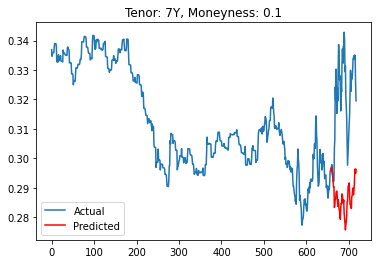

In [51]:
forecast_len = 60
test_len = 60
tenor_i = 10
moneyness_i =0
start_day=-1
train_data = surfaces[:-test_len,tenor_i,moneyness_i]
test_data = surfaces[-test_len:,tenor_i,moneyness_i]


model = AutoReg(train_data, lags=200)
yhat = get_pred(train_data,model,forecast_len=forecast_len,start_day=start_day)

plot_pred(train_data,test_data,yhat,tenor_i,moneyness_i,forecast_len = forecast_len,start_day=start_day)

**ARIMA - AutoRegressive Integrated Moving Average**

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



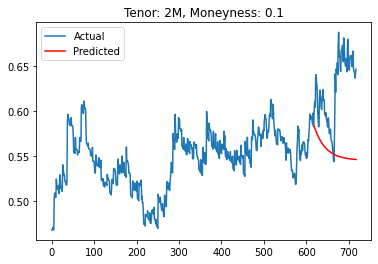

In [54]:
forecast_len = 100
start_day=-1

test_len = 60
tenor_i = 0
moneyness_i =0

train_data = surfaces[:-forecast_len,tenor_i,moneyness_i]
test_data = surfaces[-forecast_len:,tenor_i,moneyness_i]
model = ARIMA(train_data, order=(1, 0, 2))

yhat = get_pred(train_data,model,forecast_len=forecast_len,start_day=start_day)

plot_pred(train_data,test_data,yhat,tenor_i,moneyness_i,forecast_len = forecast_len,start_day=start_day)

In [61]:
hyperparameters= list(product(range(10),range(0),range(0)))

In [57]:
results = {}
forecast_len = 30
tenor_i = 10
moneyness_i =10
test_len=60

train_data = surfaces[:-test_len,tenor_i,moneyness_i]
test_data = surfaces[-test_len:,tenor_i,moneyness_i]

In [59]:
import warnings
warnings.filterwarnings("ignore")
for hyperparameter in hyperparameters:
    model = ARIMA(train_data, order=hyperparameter)
    yhat = get_pred(train_data,test_data,model,forecast_len=forecast_len)
    rmse = get_rmse(test_data,yhat)
    print(hyperparameter," : ",rmse)
    results[hyperparameter]=rmse

In [ ]:
results

{(0, 0, 0): 0.04405586639337829,
 (0, 0, 1): 0.04300130877475536,
 (0, 0, 2): 0.04139148781122553,
 (0, 1, 0): 0.023024205935302675,
 (0, 1, 1): 0.022816889418840264,
 (0, 1, 2): 0.02234943034954023,
 (0, 2, 0): 0.10611631357597062,
 (0, 2, 1): 0.0518012460036137,
 (0, 2, 2): 0.05465450156575279,
 (1, 0, 0): 0.021222950485151378,
 (1, 0, 1): 0.021446598039123094,
 (1, 0, 2): 0.019808956528900447,
 (1, 1, 0): 0.022823282559874054,
 (1, 1, 1): 0.022812396829806514,
 (1, 1, 2): 0.022542513881293406,
 (1, 2, 0): 0.03522132549470811,
 (1, 2, 1): 0.03397709540352012,
 (1, 2, 2): 0.03530707309979656,
 (2, 0, 0): 0.021597252351365576,
 (2, 0, 1): 0.02098466078231851,
 (2, 0, 2): 0.02054053955173464,
 (2, 1, 0): 0.02271673958235,
 (2, 1, 1): 0.025408108580821726,
 (2, 1, 2): 0.022128759631438105,
 (2, 2, 0): 0.03723246014566047,
 (2, 2, 1): 0.04857725048301318,
 (2, 2, 2): 0.10610124980234556}

**SARIMAX - Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors**

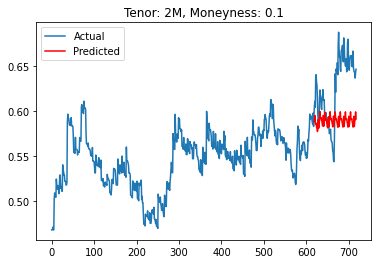

In [64]:
forecast_len = 100
start_day=-1

test_len = 60
tenor_i = 0
moneyness_i =0

train_data = surfaces[:-forecast_len,tenor_i,moneyness_i]
test_data = surfaces[-forecast_len:,tenor_i,moneyness_i]
model = SARIMAX(train_data, order=(1, 0, 2),seasonal_order=(1, 1, 0, 12))

yhat = get_pred(train_data,model,forecast_len=forecast_len,start_day=start_day)

plot_pred(train_data,test_data,yhat,tenor_i,moneyness_i,forecast_len = forecast_len,start_day=start_day)

### **Method 2 - Multivariate stacked LSTM Model**

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [25]:
surfaces_flat = surfaces.reshape(718,361) #consists of flattened vectors over time

In [26]:
train,test = surfaces_flat[:-210,:],surfaces_flat[-210:,:]

In [27]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

**Hyperparameter Tuning**

In [205]:
models = []
history_models = []
rmse_models = []
hyperparameters = []
lstm_cells_list = [100]
n_past_list = [90,120,]
n_future = 60
n_features=361
x_ans_list = []
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []
for lstm_cells in lstm_cells_list:
    for n_past in n_past_list:
        hyperparameter = {"lstm_cells":lstm_cells,"n_past":n_past}

        X_train, y_train = split_series(train,n_past, n_future)
        X_test, y_test = split_series(test,n_past, n_future)
        x_ans_list.append(X_test[-1:])
        X_train_list.append(X_train)
        X_test_list.append(X_test)
        y_train_list.append(y_train)
        y_test_list.append(y_test)

        encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
        encoder_l1 = tf.keras.layers.LSTM(lstm_cells, return_state=True)
        encoder_outputs1 = encoder_l1(encoder_inputs)

        encoder_states1 = encoder_outputs1[1:]

        #
        decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

        #
        decoder_l1 = tf.keras.layers.LSTM(lstm_cells, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
        decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

        #
        model = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

        #
        model.summary()

        loss_fn = tf.keras.losses.MeanSquaredError()
        metric_fn = tf.keras.metrics.RootMeanSquaredError()
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


        model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(),metrics=[metric_fn])
        history=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),batch_size=32,verbose=2,callbacks=[callback])
        _, rmse = model.evaluate(X_test,y_test)

        models.append(model)
        history_models.append(history)
        rmse_models.append(rmse)
        hyperparameters.append([hyperparameter,rmse])
        X_train_shapes.append(X_train.shape)

        X_test_shapes.append(X_test.shape)

Model: "model_50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_51 (InputLayer)          [(None, 90, 361)]    0           []                               
                                                                                                  
 lstm_100 (LSTM)                [(None, 100),        184800      ['input_51[0][0]']               
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 repeat_vector_50 (RepeatVector  (None, 120, 100)    0           ['lstm_100[0][0]']               
 )                                                                                         

In [194]:
sorted(hyperparameters,key = lambda x:x[1])

[[{'lstm_cells': 100, 'n_past': 90}, 0.04618973284959793]]

In [111]:
best_model_i = rmse_models.index(min(rmse_models))

## **Submission**

In [117]:
def get_final_df(model_i):
    x_ans = x_ans_list[model_i]
    best_model = models[model_i]
    y_ans_1_60_361 = best_model.predict(x_ans)
    y_ans = y_ans_1_60_361[0].reshape(n_future,19,19)

    ans_surfaces = np.vstack(y_ans)
    df_ans_sub = pd.DataFrame(ans_surfaces)
    df_ans_ =  pd.concat([df_ans[['Date','Tenor']], df_ans_sub], axis=1)
    df_ans_.columns = df_ans.columns

    return df_ans_

In [128]:
df_final = get_final_df(best_model_i)

In [129]:
df_final

,Date,Tenor,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
0,10/15/2019,2M,0.488703,0.463883,0.423393,0.380733,0.338492,0.279201,0.245926,0.206379,0.176898,0.160319,0.176599,0.193141,0.186734,0.186584,0.264800,0.243275,0.281949,0.281452,0.278104
1,10/15/2019,3M,0.447438,0.408509,0.320370,0.324349,0.306075,0.236687,0.206429,0.226920,0.213314,0.199839,0.166874,0.166158,0.202601,0.166484,0.215259,0.209475,0.260152,0.253235,0.277384
2,10/15/2019,6M,0.382343,0.370501,0.308091,0.283810,0.255573,0.257760,0.206072,0.153575,0.205909,0.193066,0.173825,0.156518,0.179790,0.129483,0.156892,0.186282,0.193026,0.210233,0.214113
3,10/15/2019,9M,0.369795,0.302297,0.352219,0.250728,0.241351,0.235781,0.217027,0.215578,0.197446,0.194788,0.193568,0.183182,0.143954,0.184255,0.194502,0.192435,0.162180,0.208210,0.192152
4,10/15/2019,1Y,0.327295,0.248208,0.288880,0.252608,0.227153,0.209642,0.189255,0.192293,0.191851,0.183732,0.188690,0.184482,0.163680,0.170924,0.174335,0.191865,0.175175,0.188962,0.167945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1/6/2020,15Y,0.276310,0.250895,0.232176,0.210950,0.201681,0.187196,0.177363,0.168561,0.164472,0.153946,0.147570,0.144955,0.138380,0.136749,0.136724,0.137897,0.135432,0.135580,0.131940
1136,1/6/2020,20Y,0.251796,0.234413,0.212644,0.195908,0.182436,0.168054,0.160350,0.150206,0.151796,0.140454,0.134462,0.134670,0.128584,0.123494,0.125425,0.127482,0.122366,0.127657,0.129566
1137,1/6/2020,25Y,0.242032,0.220355,0.199897,0.189588,0.176393,0.162436,0.157419,0.147617,0.136800,0.139736,0.127776,0.121426,0.121266,0.118316,0.119510,0.122030,0.119772,0.121194,0.123171
1138,1/6/2020,30Y,0.230336,0.214774,0.200141,0.182702,0.165342,0.157626,0.150904,0.139885,0.132049,0.126258,0.124309,0.126991,0.119402,0.113992,0.122168,0.120672,0.121583,0.123036,0.124174


In [ ]:
df_final.to_csv("submission_final.csv")